In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os 
import nibabel as nib


In [ ]:
df = pd.read_csv("drive/MyDrive/dementia/ADNI1_Complete_1Yr_1.5T_11_16_2022.csv")
df = df[['Image Data ID', 'Group','Age', 'Sex']]
df.rename(columns={'Image Data ID':'MRI_ID', 'Group':'Diagnosis'}, inplace=True)

path = "drive/MyDrive/dementia"
list_dir = os.listdir(path)
final_df = pd.DataFrame(columns=["MRI_Path", "Diagnosis"])
for i in range(0,2294):
	for nifti in list_dir:
		if df.MRI_ID[i] in nifti:
			print(str(df.MRI_ID[i]) + " added")
			new_row = {"MRI_Path" : nifti, "Diagnosis" : df.Diagnosis[i]}
			final_df = pd.concat([final_df,pd.DataFrame([new_row])], ignore_index=True)
   
list_of_paths = []
diagnosis = []

list_of_paths = final_df['MRI_Path'].tolist()
diagnosis = final_df['Diagnosis'].tolist()

In [ ]:
existing_ids = [os.path.basename(f).split("_")[-1].split(".")[0] for f in list_of_paths]
df = df.loc[df['MRI_ID'].isin(existing_ids)]

In [ ]:
binary_list_of_paths = []
binary_diagnosis = []

def keep_binary(start_index, end_index):
  for i in range(start_index, end_index):
    if diagnosis[i]!="MCI":
      binary_list_of_paths.append(list_of_paths[i])
      binary_diagnosis.append(diagnosis[i])
      print("appended MRI number " + str(i))

  print(len(binary_list_of_paths), len(binary_diagnosis))

In [ ]:
keep_binary(0,len(list_of_paths))

In [ ]:
data = {'MRI_Path': binary_list_of_paths, 'Diagnosis': binary_diagnosis}
binary_df = pd.DataFrame(data)

In [ ]:
binary_df.groupby(binary_df.Diagnosis).count()

,MRI_Path
Diagnosis,
AD,320
CN,443


In [ ]:
def show_slices(img):
	slice_x = img[50,:,:]
	slice_y = img[:,50,:]
	slice_z = img[:,:,50]
	slices = [slice_x, slice_y, slice_z]

	fig,axis = plt.subplots(1,len(slices))
	for i, slice in enumerate(slices):
	  axis[i].imshow(slice.T, cmap="gray", origin="lower")
	plt.show()

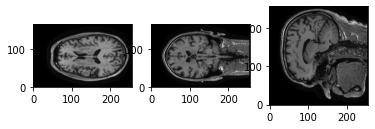

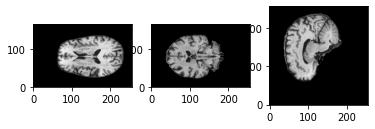

In [ ]:
raw = nib.load("drive/MyDrive/ADNI_133_S_0792_MR_MPR__GradWarp__B1_Correction__N3__Scaled_2_Br_20081008094227100_S29222_I119622.nii").get_fdata()
show_slices(raw)
stripped = nib.load("drive/MyDrive/dementia/stripped_ADNI_133_S_0792_MR_MPR__GradWarp__B1_Correction__N3__Scaled_2_Br_20081008094227100_S29222_I119622.nii").get_fdata()
show_slices(stripped)

In [ ]:
img = nib.load('drive/MyDrive/dementia/' + list_of_paths[199])
data = img.get_fdata()

# Get the voxel intensity values
voxels = data.flatten()

# Create the histogram
plt.hist(voxels, bins=50, color = "mediumpurple")
plt.title('Voxel Intensity Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
img = nib.load('drive/MyDrive/dementia/' + list_of_paths[199])
data = img.get_fdata()
data = remove_zero_rows_columns_slices(data)

# Get the voxel intensity values
voxels = data.flatten()

# Create the histogram
plt.hist(voxels, bins=50, color="mediumpurple")
plt.title('Voxel Intensity Histogram(only-0 lines removed)')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
def remove_zero_rows_columns_slices(data):
    # Find the slices that have only zero values
    blank_slices = np.where(~np.all(data == 0, axis=(1, 2)))[0]
    
    # Remove the blank slices from the data
    first_valid_slice = 0 if len(blank_slices) == 0 else blank_slices[0]
    last_valid_slice = data.shape[0] - 1 if len(blank_slices) == 0 else blank_slices[-1]
    data = data[first_valid_slice:last_valid_slice + 1, :, :]
    
    # Find the rows that have only zero values
    blank_rows = np.where(~np.all(data == 0, axis=(0, 2)))[0]
    
    # Remove the blank rows from the data
    first_valid_row = 0 if len(blank_rows) == 0 else blank_rows[0]
    last_valid_row = data.shape[1] - 1 if len(blank_rows) == 0 else blank_rows[-1]
    data = data[:, first_valid_row:last_valid_row + 1, :]
    
    # Find the columns that have only zero values
    blank_columns = np.where(~np.all(data == 0, axis=(0, 1)))[0]
    
    # Remove the blank columns from the data
    first_valid_column = 0 if len(blank_columns) == 0 else blank_columns[0]
    last_valid_column = data.shape[2] - 1 if len(blank_columns) == 0 else blank_columns[-1]
    data = data[:, :, first_valid_column:last_valid_column + 1]
    
    return data

In [ ]:
def make_intensity_histogram(strt, end):
  # List to hold the MRI images
  images = []

  # Load the MRI images into the list
  for i in range(strt,end):
      images.append(remove_zero_rows_columns_slices(nib.load("drive/MyDrive/dementia/" + list_of_paths[i]).get_fdata()))

  for i, image in enumerate(images):
      non_zero_vals = image[image != 0]
      plt.hist(non_zero_vals, bins=256, color=plt.cm.viridis(i/len(images)), alpha=0.5, label=f'MRI {i+1}')

  plt.xlabel('Intensity Value')
  plt.ylabel('Frequency')
  plt.title('Intensity Value Histograms of Images')
  plt.legend()
  plt.grid(True)

  plt.show()

In [ ]:
make_intensity_histogram(90,91)

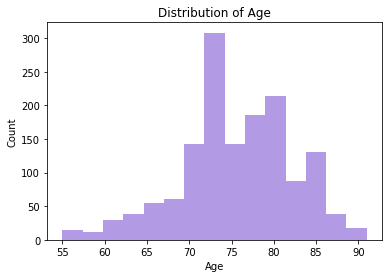

the mean is: 75.52571041948579
the median is 76.0
min is 55 max is 91
the range is 36


In [ ]:
# Plot a histogram of the ages
n, bins, patches = plt.hist(df["Age"], bins=15, color="mediumpurple", alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")
plt.show()

ages = df['Age'].values
mean = np.mean(ages)
median = np.median(ages)
mode = np.argmax(np.bincount(ages))
range = np.max(ages) - np.min(ages)
quantiles = np.percentile(ages, [25, 50, 75])

print("the mean is: " + str(mean))
print("the median is " + str(median))
print("min is " + str(np.min(ages)) + " max is " + str(np.max(ages)))
print("the range is " + str(range))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


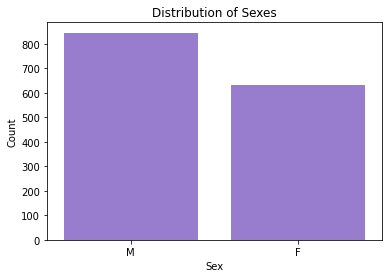

In [ ]:
# Plot a bar chart of the distribution of sexes
sns.countplot(df["Sex"], color="mediumpurple")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Distribution of Sexes")
plt.show()

In [ ]:
df.groupby(df["Sex"]).count()

,MRI_ID,Diagnosis,Age
Sex,,,
F,633,633,633
M,845,845,845


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


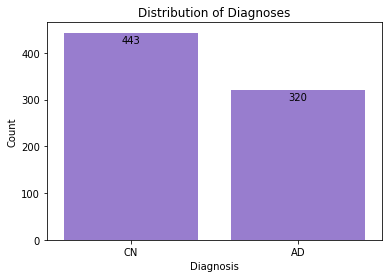

In [ ]:
# Plot a bar chart of the distribution of diagnoses
ax = sns.countplot(binary_df["Diagnosis"], color="mediumpurple")

# Annotate the bars with the counts
for i, p in enumerate(ax.patches):
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, -7) if i == 0 or i == 1 else (0, 10),
                textcoords='offset points')

# Add axis labels and title
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.title("Distribution of Diagnoses")

# Show the plot
plt.show()

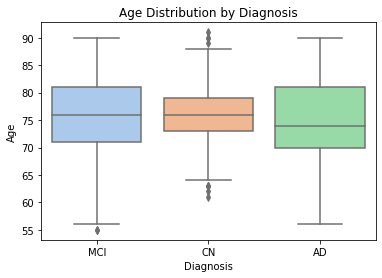

In [ ]:
# Plot a box plot to compare the ages for each diagnosis
sns.boxplot(x="Diagnosis", y="Age", data=df, palette='pastel')
plt.xlabel("Diagnosis")
plt.ylabel("Age")
plt.title("Age Distribution by Diagnosis")
plt.show()

In [ ]:
grouped = df.groupby("Diagnosis")
stats = grouped["Age"].agg(["min", "max", "mean", lambda x: x.max() - x.min()])
stats.columns = ["Min Age", "Max Age", "Mean Age", "Range"]
stats

,Min Age,Max Age,Mean Age,Range
Diagnosis,,,,
AD,56,90,74.696875,34
CN,61,91,76.246050,30
MCI,55,90,75.450350,35


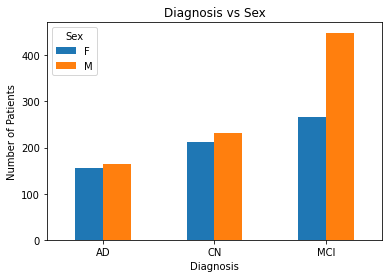

In [ ]:
# Create a bar plot to compare diagnosis and sex
grouped = df.groupby(['Diagnosis', 'Sex'])
grouped.size().unstack().plot(kind='bar', stacked=False)
plt.xlabel('Diagnosis')
plt.xticks(rotation=0)
plt.ylabel('Number of Patients')
plt.title('Diagnosis vs Sex')
plt.show()

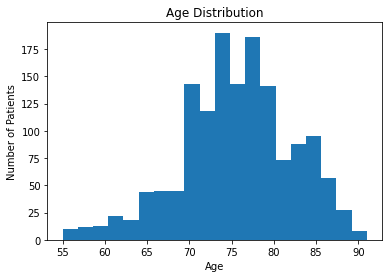

In [ ]:
# Create a histogram to visualize the distribution of ages
plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age Distribution')
plt.show()

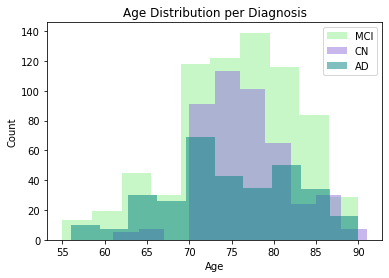

In [ ]:
colors = ['lightgreen', 'mediumpurple', 'teal']

# Create a plot for each diagnosis type
for i, diagnosis in enumerate(df['Diagnosis'].unique()):
    diagnosis_df = df[df['Diagnosis'] == diagnosis]
    diagnosis_df['Age'].plot(kind='hist', alpha=0.5, color=colors[i], label=diagnosis)
    plt.legend()
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.title('Age Distribution per Diagnosis')

plt.show()

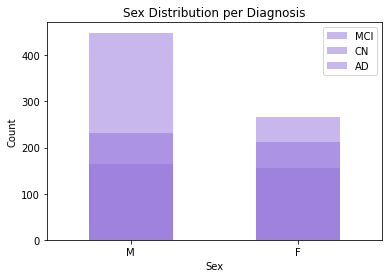

In [ ]:
for diagnosis in df['Diagnosis'].unique():
    diagnosis_df = df[df['Diagnosis'] == diagnosis]
    counts = diagnosis_df['Sex'].value_counts()
    counts.plot(kind='bar', alpha=0.5, label=diagnosis, color="purple")
    plt.legend()
    plt.xlabel('Sex')
    plt.xticks(rotation=0)
    plt.ylabel('Count')
    plt.title('Sex Distribution per Diagnosis')

plt.show()

In [ ]:
grouped = df.groupby('Diagnosis')
counts = grouped['Sex'].value_counts()
print(counts)

Diagnosis  Sex
AD         M      164
           F      156
CN         M      232
           F      211
MCI        M      449
           F      266
Name: Sex, dtype: int64


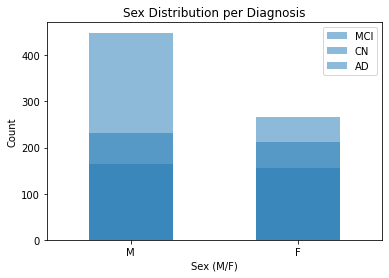

In [ ]:
for diagnosis in df['Diagnosis'].unique():
    diagnosis_df = df[df['Diagnosis'] == diagnosis]
    counts = diagnosis_df['Sex'].value_counts()
    counts.plot(kind='bar', alpha=0.5, label=diagnosis)
    plt.legend()
    plt.xticks(rotation=0)
    plt.xlabel('Sex (M/F)')
    plt.ylabel('Count')
    plt.title('Sex Distribution per Diagnosis')

plt.show()

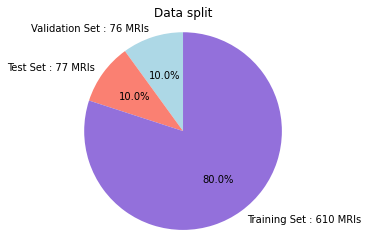

In [ ]:
# data
sizes = [10, 10, 80]
labels = ['Validation Set : 76 MRIs', 'Test Set : 77 MRIs', 'Training Set : 610 MRIs']

colors = ['lightblue', 'salmon', 'mediumpurple']

# plot pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors = colors)
ax.axis('equal')  # equal aspect ratio ensures that pie is drawn as a circle
ax.set_title('Data split')

plt.show()


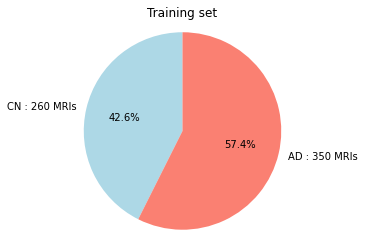

In [ ]:
# data
sizes = [42.6, 57.4]
labels = ['CN : 260 MRIs', 'AD : 350 MRIs']

colors = ['lightblue', 'salmon', 'mediumpurple']

# plot pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors = colors)
ax.axis('equal')  # equal aspect ratio ensures that pie is drawn as a circle
ax.set_title('Training set')

plt.show()

In [ ]:
sizes = [31.36, 34.98, 33.66]
labels = ['MCI : 615 MRIs', 'CN : 686 MRIs', 'AD : 660 MRIs']

colors = ['lightblue', 'salmon', 'mediumpurple']

# plot pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors = colors)
ax.axis('equal')  # equal aspect ratio ensures that pie is drawn as a circle
ax.set_title('Balanced training set')

plt.show()

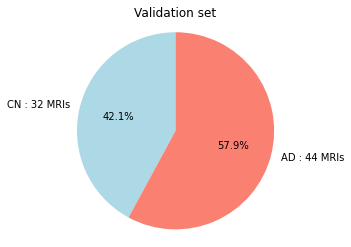

In [ ]:
# data
sizes = [42.1, 57.9]
labels = ['CN : 32 MRIs', 'AD : 44 MRIs']

colors = ['lightblue', 'salmon', 'mediumpurple']

# plot pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors = colors)
ax.axis('equal')  # equal aspect ratio ensures that pie is drawn as a circle
ax.set_title('Validation set')

plt.show()